In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer



/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml20250203/code/Users/6b022/DL3_20241006/ch05
/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml20250203/code/Users/6b022/DL3_20241006


In [2]:
# MNiST 데이터 읽기=============
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비율 설정 ===========
use_dropout = True # 드롭아웃 쓰지 않을 때는 False
# 드롭아웃 비율 설정
dropout_ratio = 0.15

In [3]:
network = MultiLayerNetExtend(
    input_size=784, 
    hidden_size_list=[100, 100, 100, 100, 100, 100], 
    output_size=10,
    use_dropout=use_dropout,
    dropout_ration=dropout_ratio
)

trainer = Trainer(network, x_train, t_train, x_test, t_test, 
    epochs=301,
    mini_batch_size=100, 
    optimizer='sgd',
    optimizer_param={'lr':0.01},
    verbose=True
)

trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.30772187639275
=== epoch:1, train acc:0.12, test acc:0.0926 ===
train loss:2.3206717000767885
train loss:2.302656481846772
train loss:2.291466510830263
=== epoch:2, train acc:0.13, test acc:0.0955 ===
train loss:2.3086910310336575
train loss:2.307545592371998
train loss:2.3145450692544873
=== epoch:3, train acc:0.13, test acc:0.0971 ===
train loss:2.3077185442530617
train loss:2.3154474427176397
train loss:2.3026499445442665
=== epoch:4, train acc:0.13333333333333333, test acc:0.0995 ===
train loss:2.3093038670340365
train loss:2.2976038564744137
train loss:2.2917798353199923
=== epoch:5, train acc:0.14333333333333334, test acc:0.1074 ===
train loss:2.2745675236280856
train loss:2.293933189996159
train loss:2.278055876860778
=== epoch:6, train acc:0.14666666666666667, test acc:0.1105 ===
train loss:2.2899866424930635
train loss:2.2913897282508806
train loss:2.2847481445888205
=== epoch:7, train acc:0.15333333333333332, test acc:0.1154 ===
train loss:2.287679110759725
train

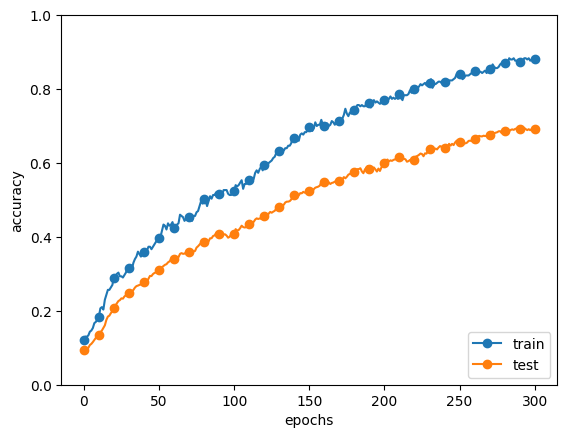

In [4]:
# 그래프 그리기 ==================
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='o', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()